In [1]:
import os
import SimpleITK as sitk
import sys
sys.path.append("/home/local/VANDERBILT/litz/github/MASILab/thoraxtools/func")
import vis.vis
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

In [2]:
def showslice(img, z, y, x, is_gray=False, clip_range=[]):
    clip_ax = img[z, :, :]
    clip_ax = np.flip(clip_ax,0)
    clip_cor = img[:,y,:]
    clip_cor = np.flip(clip_cor, 0)
    clip_sag = img[:,:,x]
    clip_sag = np.rot90(np.rot90(clip_sag))
    # clip_sag = np.flip(clip_sag, 0)
    if len(clip_range) > 0:
        vmin = clip_range[0]
        vmax = clip_range[1]
    else:
        vmax = np.max(img)
        vmin = np.min(img)
    # fig = plt.figure(1)
    f, ax = plt.subplots(1, 3, figsize=(15, 15))
    if is_gray:
        ax[0].imshow(clip_ax, interpolation='nearest', cmap='gray', vmin=vmin, vmax=vmax)
        ax[1].imshow(clip_cor, interpolation='nearest', cmap='gray', vmin=vmin, vmax=vmax)
        sag = ax[2].imshow(clip_sag, interpolation='nearest', cmap='gray', vmin=vmin, vmax=vmax)
        
    else:
        ax[0].imshow(clip_ax, interpolation='nearest', vmin=vmin, vmax=vmax)
        ax[1].imshow(clip_cor, interpolation='nearest', vmin=vmin, vmax=vmax)
        sag = ax[2].imshow(clip_sag, interpolation='nearest', vmin=vmin, vmax=vmax)
    plt.colorbar(sag, ax=ax[2], fraction=0.046, pad=0.04)

In [3]:
root_dir = "/home/local/VANDERBILT/litz/data/imagevu/nifti/active_learning/johof_labels"
# scanid = "00000658time20170519"
# scanid = "00001097time20180411"
scanid = "00000137time20160812"
label_path = os.path.join(root_dir, f"{scanid}_lvlsetseg.nii.gz")
img_path = os.path.join(root_dir, f"{scanid}.nii.gz")

label_sitk = sitk.ReadImage(label_path)
img_sitk = sitk.ReadImage(img_path)
label = sitk.GetArrayFromImage(label_sitk)
img = sitk.GetArrayFromImage(img_sitk)
print(label_sitk.GetSize(), img_sitk.GetSize())

(512, 512, 320) (768, 768, 693)


In [66]:
print(label_sitk.GetOrigin())
print(img_sitk.GetOrigin())
print(label_sitk.GetSpacing())
print(img_sitk.GetSpacing())
print(label_sitk.GetDirection())
print(img_sitk.GetDirection())

(-187.4980010986328, 300.240234375, -304.9504089355469)
(-187.4980010986328, 300.240234375, -304.9504089355469)
(0.759765625, 0.759765625, 1.0499839782714844)
(0.759765625, 0.759765625, 0.79998779296875)
(1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)


In [71]:
s = img_sitk.GetSize()
s = (s[2], s[0],s[1])
# resize_t = Resize(spatial_size=s, mode="nearest")
resize_label = resize(label, s, order=0)
print(label.shape)
print(resize_label.shape)

(320, 512, 512)
(420, 512, 512)


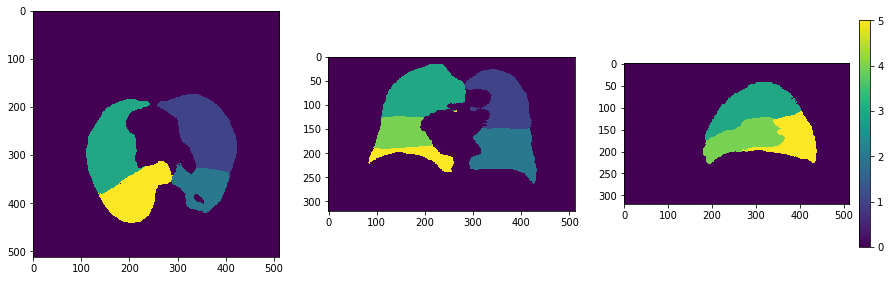

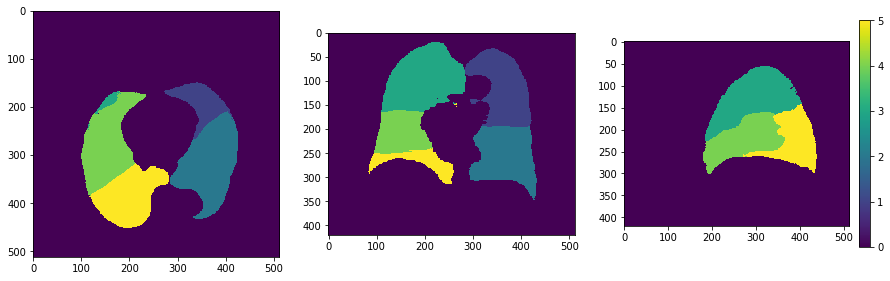

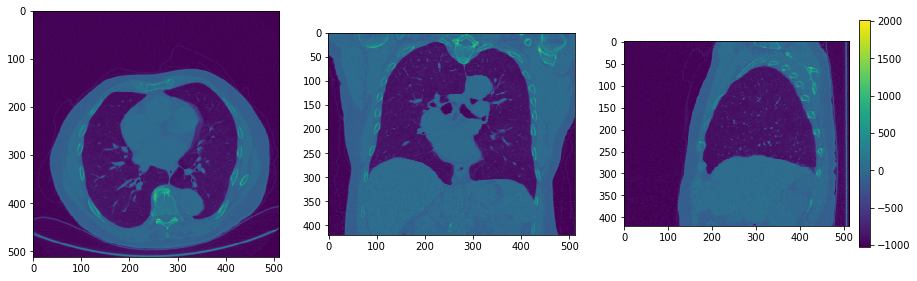

In [72]:
# vis.vis.showslice(label, 250,250,200)
showslice(label, 200, 200, 150)
showslice(resize_label, 200, 200, 150)
showslice(img, 200,200,150)

In [76]:
resize_sitk = sitk.GetImageFromArray(resize_label)
resize_sitk.CopyInformation(img_sitk)
print(resize_sitk.GetOrigin())
print(resize_sitk.GetSpacing())
print(resize_sitk.GetDirection())
out_path = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/tmp"
sitk.WriteImage(resize_sitk, os.path.join(out_path, f"{scanid}.nii.gz"))

(-187.4980010986328, 300.240234375, -304.9504089355469)
(0.759765625, 0.759765625, 0.79998779296875)
(1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
